# Skew Is More Apparent In The 95th Percentile Than 75th

Warning message:
“package ‘tidyverse’ was built under R version 3.4.2”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
Warning message:
“package ‘tidyr’ was built under R version 3.4.2”Warning message:
“package ‘purrr’ was built under R version 3.4.2”Warning message:
“package ‘dplyr’ was built under R version 3.4.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



95% 
5.242984

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


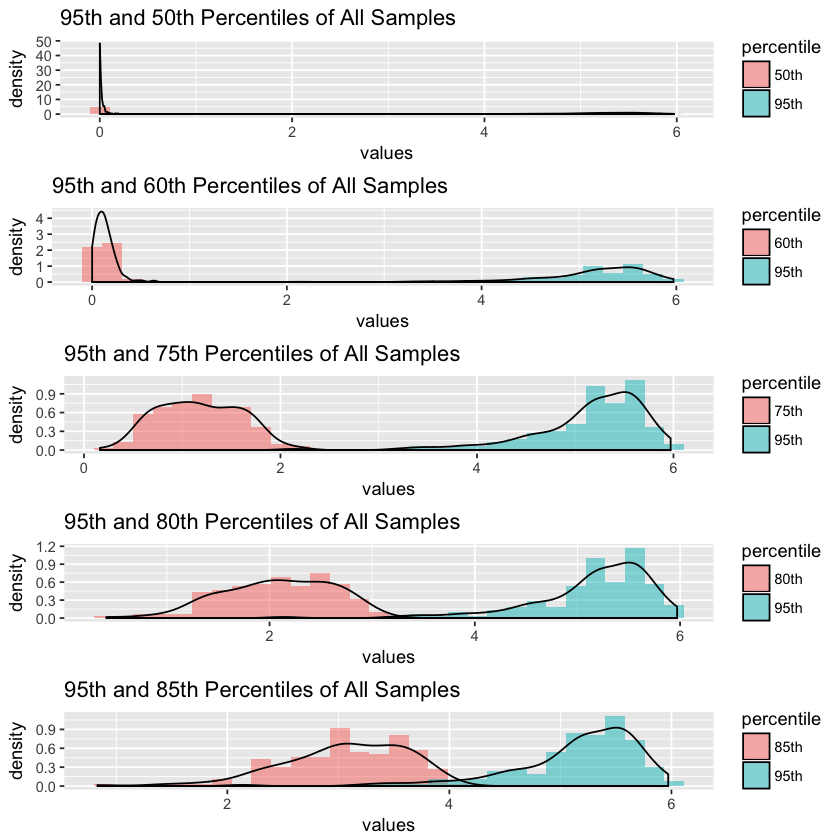

sample == 0,n
FALSE,4124131
TRUE,4428695


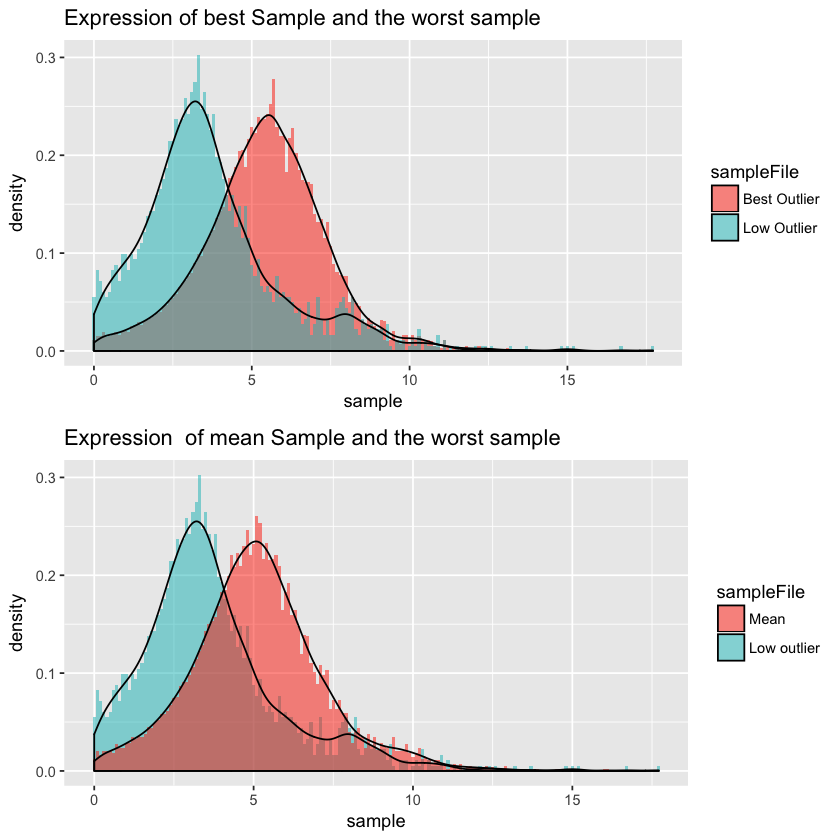

In [2]:
# OutlierResults_sample_column_95thpercentile.r

# - finds 95th percentile overall of comp4.3_tert8.ckcc.outlier_results
# - compares the lowest 95th percentile sample individually
#   to overall, middle, and best 95th percentile score


options(stringsAsFactors=FALSE) # for compatibile code between us

library(tidyverse)
library(gridExtra) # easy for putting graphs onto the same page (just use ggarrange(graph1, graph2, ncol = # of display
                # columns, nrow = #row))


setwd("~/Documents/UCSC/Junior/Treehouse/OutlierRNAseq_Treehouse_Repo/comp4.3_tert8.ckcc.outlier_results")

up_outlier_files=list.files(, "outlier_results_")

outlierResults<-lapply(up_outlier_files, function(x) {
	read_tsv(x, col_types=cols()) %>%
	add_column(sampleID=gsub("outlier_results_", "", x))
	}) 	%>%
	bind_rows()

quantile(outlierResults$sample, c(0.95)) 
# 95% = 5.242984
# the genes that are 5.242984 log2(TPM+1) and above are useful currently
# Should 0.0 TPM be considered in the data?
# What is a cutoff point that is reliably accurate that the values are in the child's DNA for that gene

# each percentile is a percentile of the sample in the sample column

percentileOfEachSampleDf <- outlierResults %>%
  group_by(sampleID) %>%
  summarise(p95 = quantile(sample, c(0.95)),p75 = quantile(sample, c(0.75))
            ,p80 = quantile(sample, c(0.80)),p60 = quantile(sample, c(0.60)),
            p50 = quantile(sample, c(0.50)),p85 = quantile(sample, c(0.85)) ) %>%
  arrange(desc(p95))

## created my own function to concatenate two columns and compare them in ggplot with a 
# comparison needed 
# (basically generalizes what is written from the tutorial)
createBoundedData <- function(col1, col2, nameOfComparison, name1, name2) {
  ## very useful tutorial for plotting two histograms together
  # https://stackoverflow.com/questions/3541713/how-to-plot-two-histograms-together-in-r/3557042
  # p95df <- data.frame(percentileOfEachSampleDf$p95)
  # p95df <- rename(p95df, 'value' = percentileOfEachSampleDf.p95)
  # 
  # p75df <- data.frame(percentileOfEachSampleDf$p75) 
  # p75df <- rename(p75df, 'value' = percentileOfEachSampleDf.p75)
  # 
  # p95df$percentile <- '95th'
  # p75df$percentile <- '75th'
  # 
  # bothPercentiles <- rbind(p95df, p75df)

  col1df <- data.frame(col1)
  col1df <- rename(col1df, 'value' = col1)


  col2df <- data.frame(col2)
  col2df <- rename(col2df, 'value' = col2)

  col1df$nameOfComparison <- name1
  col2df$nameOfComparison <- name2

  bothBoundedData <- rbind(col1df, col2df)
  colnames (bothBoundedData) <- c("values", nameOfComparison)
  return(bothBoundedData)
}


### Week 2
# 50th, 60th, 75th, 80th, 85th compared to 95th percentile
{
  
  bothPercentilesOne <- createBoundedData(percentileOfEachSampleDf$p95, 
                                          percentileOfEachSampleDf$p75, 
                                          "percentile", '95th', '75th')
  
  bothPercentilesTwo <- createBoundedData(percentileOfEachSampleDf$p95, 
                                          percentileOfEachSampleDf$p80, 
                                          "percentile", '95th', '80th')
  bothPercentilesThree <- createBoundedData(percentileOfEachSampleDf$p95, 
                                            percentileOfEachSampleDf$p50, 
                                            "percentile", '95th', '50th')
  
  bothPercentilesFour <- createBoundedData(percentileOfEachSampleDf$p95, 
                                           percentileOfEachSampleDf$p60, 
                                           "percentile", '95th', '60th')
  bothPercentilesFive <- createBoundedData(percentileOfEachSampleDf$p95, 
                                           percentileOfEachSampleDf$p85, 
                                           "percentile", '95th', '85th')
  
  paFifty<- ggplot(bothPercentilesThree, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 50th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  pbSixty<- ggplot(bothPercentilesFour, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 60th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  # ---> PLOT 95th 75th percentile histograms of total samples
  pcSeventyFive<- ggplot(bothPercentilesOne, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 75th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  pdEighty<- ggplot(bothPercentilesTwo, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 80th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  
  peEightyFive <- ggplot(bothPercentilesFive, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 85th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  
  
  grob <- arrangeGrob(grobs = list(paFifty,pbSixty,pcSeventyFive,pdEighty,peEightyFive), nrow=5, ncol=1 )
  grid.arrange(grob)
}

### COMPARISONS OF BAD GOOD AND TOTAL SAMPLES 95th percentile
{
  #find out number of genes with zero 
  
  # taking the histogram of a bad sample and comparing it to all samples
  # TH01_0069_S01
  up_outlier_file_bad=list.files(, "outlier_results_TH01_0069_S01")
  
  bad_sample<-lapply(up_outlier_file_bad, function(x) {
    read_tsv(x, col_types=cols()) %>%
      add_column(sampleID=gsub("outlier_results_TH01_0069_S01", "", x))
  }) 	%>%
    bind_rows()
  
  percentileOfEachSampleDf_bad_sample <- bad_sample %>%
    group_by(sample) %>%
    summarise(p95 = quantile(sample, c(0.95)))
  
  bothPercentilesOverall_Bad <- createBoundedData(percentileOfEachSampleDf$p95,
                                                  percentileOfEachSampleDf_bad_sample$p95,
                                                  "sampleFile", 'all samples','Low outlier')
  
  ggplot(bothPercentilesOverall_Bad, aes(values, fill = sampleFile)) + 
    geom_histogram(alpha = 0.5,  position = 'identity', aes(y=..density..)) + 
    ggtitle("95th Percentiles of All Samples and the worst sample") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  
  
  #---comp 1--  comparing a good sample and a bad sample
  
  summary(percentileOfEachSampleDf)
  # TH01_0062_S01 is closest to the mean (5.159468 ~ Mean   :5.154)
  
  sample_file_good=list.files(, "outlier_results_TH01_0062_S01")
  
  good_sample<-lapply(sample_file_good, function(x) {
    read_tsv(x, col_types=cols()) %>%
      add_column(sampleID=gsub("outlier_results_TH01_0062_S01", "", x))
  }) 	%>%
    bind_rows()
  
  percentileOfEachSampleDf_good_sample <- good_sample %>%
    group_by(sample) %>%
    summarise(p95 = quantile(sample, c(0.95)))
  
  
  
  bothPercentilesGood_Bad <- createBoundedData(percentileOfEachSampleDf_good_sample$p95,
                                               percentileOfEachSampleDf_bad_sample$p95,
                                               "sampleFile", 'Mean','Low outlier')
  
  ggplot(bothPercentilesGood_Bad, aes(values, fill = sampleFile)) + 
    geom_histogram(alpha = 0.5,  position = 'identity', aes(y=..density..)) + 
    ggtitle("Expression of mean sample and the worst sample") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  
  
  #---comp 2--  comparing a Best sample and a bad sample
  
  summary(percentileOfEachSampleDf)
  # TH03_0008_S01 is highest 95th percentile (5.971084)
  
  sample_file_best=list.files(, "outlier_results_TH03_0008_S01")
  
  best_sample<-lapply(sample_file_best, function(x) {
    read_tsv(x, col_types=cols()) %>%
      add_column(sampleID=gsub("outlier_results_TH03_0008_S01", "", x))
  }) 	%>%
    bind_rows()
  
  percentileOfEachSampleDf_best_sample <- best_sample %>%
    group_by(sample) %>%
    summarise(p95 = quantile(sample, c(0.95)))
  
  
  
  bothPercentilesBest_Bad <- createBoundedData(percentileOfEachSampleDf_best_sample$p95,
                                               percentileOfEachSampleDf_bad_sample$p95,
                                               "sampleFile", 'Best Outlier','Low Outlier')
  
  p1 <- ggplot(bothPercentilesBest_Bad, aes(values, fill = sampleFile)) + 
    geom_histogram(alpha = 0.5,  position = 'identity', aes(y=..density..), binwidth = 0.1) + 
    ggtitle("Expression of best Sample and the worst sample") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..)) +
    xlab("sample") +
    scale_fill_manual(breaks = bothPercentilesBest_Bad$sampleFile, 
                      values = c("#FF2D00","#03BDC0")) 
  
  
  p2 <- ggplot(bothPercentilesGood_Bad, aes(values, fill = sampleFile)) + 
    geom_histogram(alpha = 0.5,  position = 'identity', aes(y=..density..), binwidth = 0.1) + 
    ggtitle("Expression  of mean Sample and the worst sample") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))+
    xlab("sample") + 
    scale_fill_manual(breaks = bothPercentilesGood_Bad$sampleFile, values = c("#03BDC0","#FF2D00")) 
  
  
  
  # plot both graphs side by side
  grob <- arrangeGrob(p1,p2)
  grid.arrange(p1,p2) 
}


outlierResults_sample <- outlierResults %>%
  select(sample)

# number of samples that are 0 and not zero
count(outlierResults_sample, sample == 0)
#   `sample == 0`       n
#   <lgl>           <int>
#   1 F             4124131
#   2 T             4428695


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


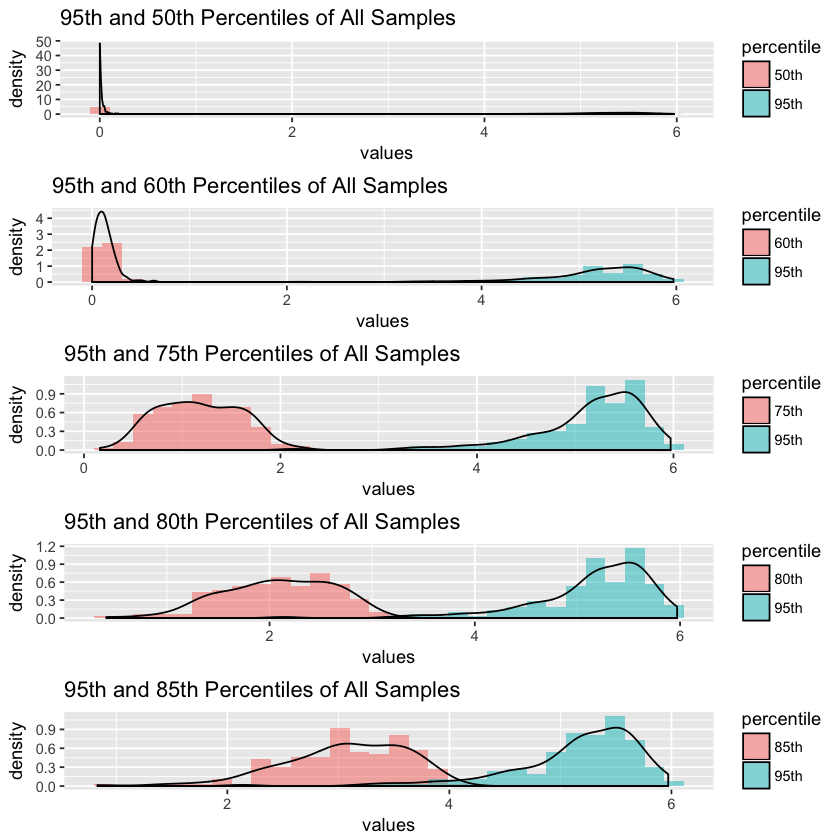

In [3]:
### Week 2
# 50th, 60th, 75th, 80th, 85th compared to 95th percentile
{
  
  bothPercentilesOne <- createBoundedData(percentileOfEachSampleDf$p95, 
                                          percentileOfEachSampleDf$p75, 
                                          "percentile", '95th', '75th')
  
  bothPercentilesTwo <- createBoundedData(percentileOfEachSampleDf$p95, 
                                          percentileOfEachSampleDf$p80, 
                                          "percentile", '95th', '80th')
  bothPercentilesThree <- createBoundedData(percentileOfEachSampleDf$p95, 
                                            percentileOfEachSampleDf$p50, 
                                            "percentile", '95th', '50th')
  
  bothPercentilesFour <- createBoundedData(percentileOfEachSampleDf$p95, 
                                           percentileOfEachSampleDf$p60, 
                                           "percentile", '95th', '60th')
  bothPercentilesFive <- createBoundedData(percentileOfEachSampleDf$p95, 
                                           percentileOfEachSampleDf$p85, 
                                           "percentile", '95th', '85th')
  
  paFifty<- ggplot(bothPercentilesThree, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 50th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  pbSixty<- ggplot(bothPercentilesFour, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 60th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  # ---> PLOT 95th 75th percentile histograms of total samples
  pcSeventyFive<- ggplot(bothPercentilesOne, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 75th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  pdEighty<- ggplot(bothPercentilesTwo, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 80th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  
  peEightyFive <- ggplot(bothPercentilesFive, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 85th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))
  
  
  grob <- arrangeGrob(grobs = list(paFifty,pbSixty,pcSeventyFive,pdEighty,peEightyFive), nrow=5, ncol=1 )
  grid.arrange(grob)
}

In [7]:
bothPercentilesOne <- createBoundedData(percentileOfEachSampleDf$p95, 
                                          percentileOfEachSampleDf$p75, 
                                          "percentile", '95th', '75th')
    
pcSeventyFive<- ggplot(bothPercentilesOne, aes(values, fill = percentile)) + 
    geom_histogram(alpha = 0.5, position = 'identity', aes(y=..density..)) + 
    ggtitle("95th and 75th Percentiles of All Samples") +
    geom_density(alpha = 0, position = 'identity', aes(y=..density..))